In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("../data/raw/train.csv")
features = pd.read_csv("../data/raw/features.csv")
stores = pd.read_csv("../data/raw/stores.csv")

In [3]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
train.shape

(421570, 5)

In [6]:
train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [7]:
train.info

<bound method DataFrame.info of         Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  2010-02-05      24924.50      False
1           1     1  2010-02-12      46039.49       True
2           1     1  2010-02-19      41595.55      False
3           1     1  2010-02-26      19403.54      False
4           1     1  2010-03-05      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  2012-09-28        508.37      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False

[421570 rows x 5 columns]>

In [12]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [14]:
features.shape

(8190, 12)

In [10]:
features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [11]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [15]:
stores.shape

(45, 3)

In [16]:
train['Date'] = pd.to_datetime(train['Date'])
features['Date'] = pd.to_datetime(features['Date'])

In [17]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [18]:
train.isna().sum()


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [19]:
features.isna().sum()


Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [20]:
stores.isna().sum()


Store    0
Type     0
Size     0
dtype: int64

In [21]:
train.to_csv("../data/processed/train_typed.csv", index=False)
features.to_csv("../data/processed/features_typed.csv", index=False)
stores.to_csv("../data/processed/stores_typed.csv", index=False)

In [22]:
train = pd.read_csv("../data/processed/train_typed.csv")

In [23]:
train['Date'] = pd.to_datetime(train['Date'])


In [24]:
train['Store'].nunique()


45

In [25]:
train['Dept'].nunique()


81

In [26]:
train.shape


(421570, 5)

In [27]:
coverage = (
    train
    .groupby(['Store', 'Dept'])
    .size()
    .reset_index(name='num_weeks')
)


In [28]:
coverage['num_weeks'].describe()


count    3331.000000
mean      126.559592
std        40.212763
min         1.000000
25%       143.000000
50%       143.000000
75%       143.000000
max       143.000000
Name: num_weeks, dtype: float64

In [29]:
coverage.head()

,Store,Dept,num_weeks
0,1,1,143
1,1,2,143
2,1,3,143
3,1,4,143
4,1,5,143


In [30]:
strong_series = coverage[coverage['num_weeks'] >= 140]

In [31]:
strong_series.head()


,Store,Dept,num_weeks
0,1,1,143
1,1,2,143
2,1,3,143
3,1,4,143
4,1,5,143


In [32]:
STORE_ID = strong_series.iloc[0]['Store']
DEPT_ID = strong_series.iloc[0]['Dept']

In [33]:
ts_df = train[
    (train['Store'] == STORE_ID) &
    (train['Dept'] == DEPT_ID)
].copy()


In [34]:
ts_df = ts_df.sort_values('Date')
ts_df = ts_df.set_index('Date')


In [35]:
ts_df.head()


,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [36]:
ts_df.tail()


,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2012-09-28,1,1,18947.81,False
2012-10-05,1,1,21904.47,False
2012-10-12,1,1,22764.01,False
2012-10-19,1,1,24185.27,False
2012-10-26,1,1,27390.81,False


In [37]:
ts_df.shape


(143, 4)

In [38]:
ts_df.to_csv("../data/processed/scoped_timeseries.csv")


In [39]:
ts_df = pd.read_csv(
    "../data/processed/scoped_timeseries.csv",
    parse_dates=['Date'],
    index_col='Date'
)


In [40]:
ts_df.index.inferred_freq


'W-FRI'

In [41]:
full_weeks = pd.date_range(
    start=ts_df.index.min(),
    end=ts_df.index.max(),
    freq='W-FRI'
)


In [42]:
ts_df = ts_df.reindex(full_weeks)


In [43]:
ts_df.isna().sum()


Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [44]:
ts_df['Weekly_Sales'] = ts_df['Weekly_Sales'].fillna(0)


In [45]:
ts_df.isna().sum()


Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [ ]:
ts_df.index.inferred_freq


'W-FRI'

In [47]:
ts_df.to_csv("../data/processed/ts_weekly_continuous.csv")


In [48]:
import pandas as pd
import matplotlib.pyplot as plt


In [50]:
ts_df.head()

,Store,Dept,Weekly_Sales,IsHoliday
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [51]:
ts_df = pd.read_csv(
    "../data/processed/ts_weekly_continuous.csv",
    index_col=0,
    parse_dates=True
)



In [52]:
ts_df.head()


,Store,Dept,Weekly_Sales,IsHoliday
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [53]:
type(ts_df.index)


pandas.core.indexes.datetimes.DatetimeIndex

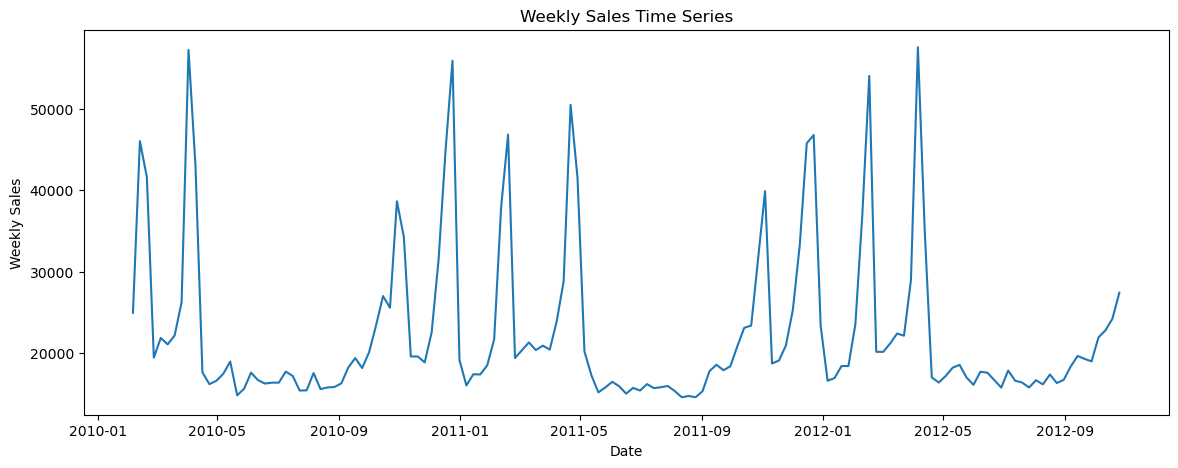

In [54]:
plt.figure(figsize=(14,5))
plt.plot(ts_df.index, ts_df['Weekly_Sales'])
plt.title("Weekly Sales Time Series")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()


In [55]:
ts_df['rolling_12w'] = ts_df['Weekly_Sales'].rolling(window=12).mean()


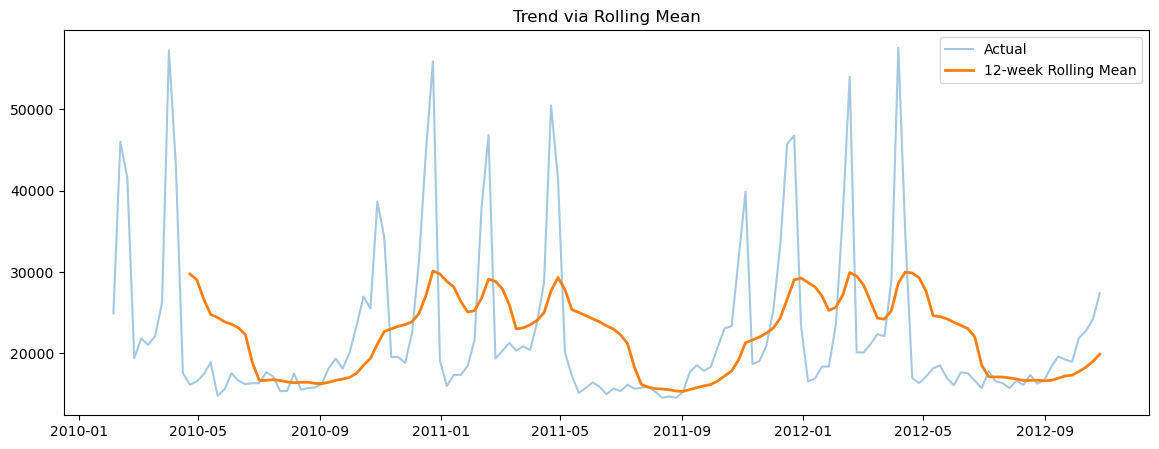

In [56]:
plt.figure(figsize=(14,5))
plt.plot(ts_df['Weekly_Sales'], alpha=0.4, label='Actual')
plt.plot(ts_df['rolling_12w'], linewidth=2, label='12-week Rolling Mean')
plt.legend()
plt.title("Trend via Rolling Mean")
plt.show()


In [57]:
ts_df['rolling_std_12w'] = ts_df['Weekly_Sales'].rolling(window=12).std()


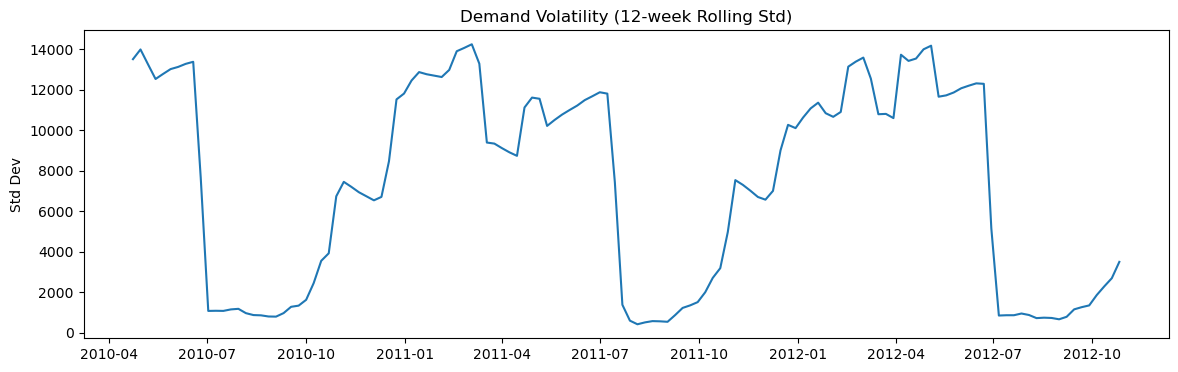

In [58]:
plt.figure(figsize=(14,4))
plt.plot(ts_df['rolling_std_12w'])
plt.title("Demand Volatility (12-week Rolling Std)")
plt.ylabel("Std Dev")
plt.show()


In [59]:
ts_df['week_of_year'] = ts_df.index.isocalendar().week


In [60]:
seasonality = ts_df.groupby('week_of_year')['Weekly_Sales'].mean()


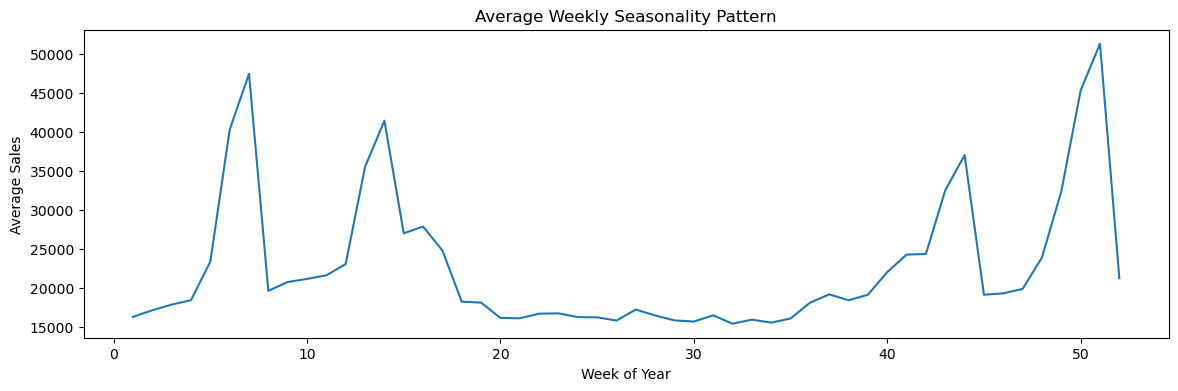

In [61]:
plt.figure(figsize=(14,4))
plt.plot(seasonality)
plt.title("Average Weekly Seasonality Pattern")
plt.xlabel("Week of Year")
plt.ylabel("Average Sales")
plt.show()


In [62]:
ts_df.to_csv("../data/processed/ts_eda_enriched.csv")


In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [64]:
# Weekly sales decomposition
result = seasonal_decompose(ts_df['Weekly_Sales'], 
                            model='additive',  # additive is most common for retail
                            period=52)         # 52 weeks = 1 year


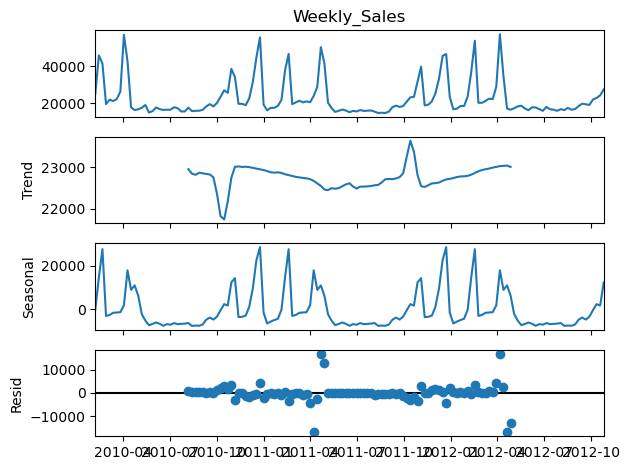

In [65]:
result.plot()
import matplotlib.pyplot as plt
plt.tight_layout()
plt.show()


In [66]:
residual = result.resid
print("Residual statistics:")
print(residual.describe())


Residual statistics:
count       91.000000
mean         3.559039
std       4330.866224
min     -17008.928220
25%       -512.899470
50%          3.559039
75%        520.017549
max      17016.046299
Name: resid, dtype: float64


In [69]:
ts_df['trend'] = result.trend
ts_df['seasonal'] = result.seasonal
ts_df['residual'] = result.resid
ts_df.index.name = 'Date'
ts_df.to_csv("../data/processed/ts_decomposed.csv")


In [70]:
import pandas as pd
ts_df = pd.read_csv("../data/processed/ts_decomposed.csv", parse_dates=['Date'], index_col='Date')


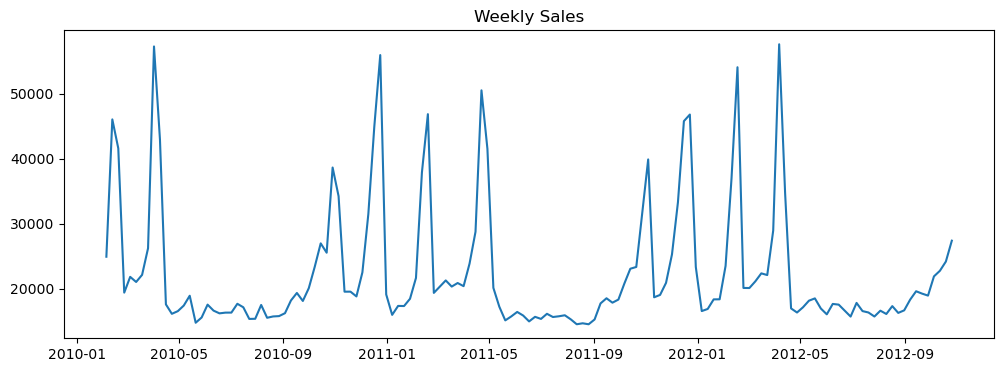

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(ts_df['Weekly_Sales'])
plt.title("Weekly Sales")
plt.show()


In [72]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(ts_df['Weekly_Sales'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: -2.5221638686500376
p-value: 0.11017432282586986


In [73]:
ts_df['Weekly_Sales_log'] = np.log1p(ts_df['Weekly_Sales'])


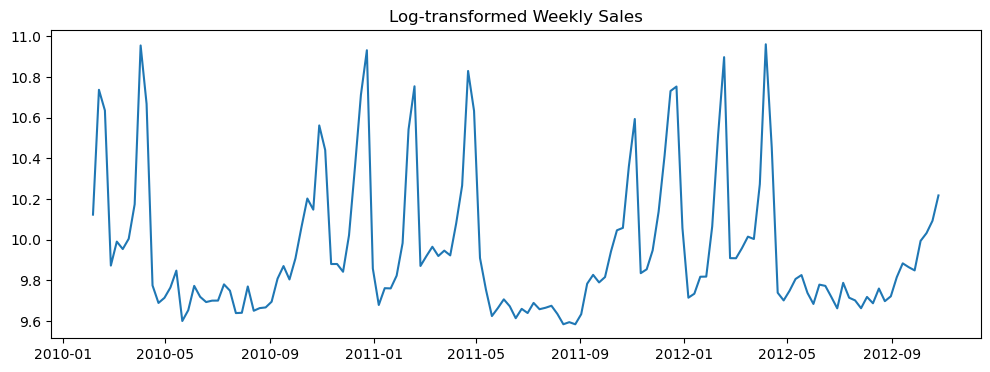

In [74]:
plt.figure(figsize=(12,4))
plt.plot(ts_df['Weekly_Sales_log'])
plt.title("Log-transformed Weekly Sales")
plt.show()


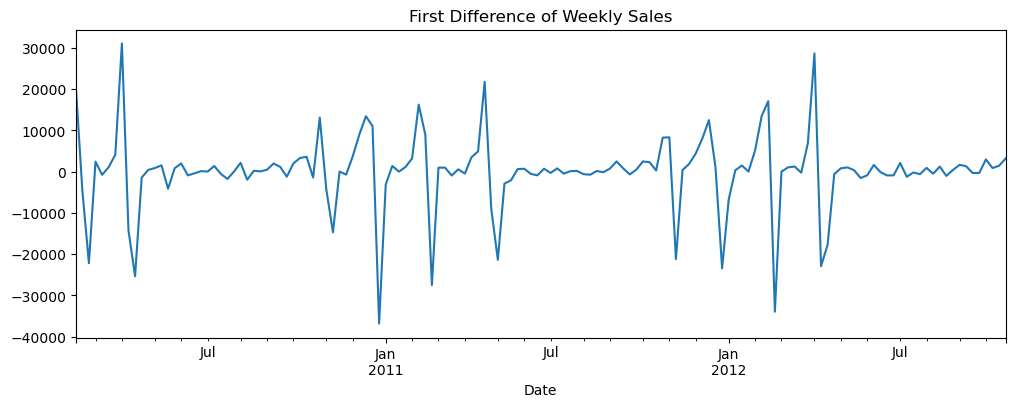

In [75]:
ts_df['Weekly_Sales_diff'] = ts_df['Weekly_Sales'].diff()
ts_df['Weekly_Sales_diff'].dropna().plot(figsize=(12,4))
plt.title("First Difference of Weekly Sales")
plt.show()


In [76]:
ts_df.to_csv("../data/processed/ts_stationary.csv")
